In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [14]:
from modules.helper import *
info = {}
info['projectPath'] = os.getcwd()
info['targetPath'] = "SOO_targets/DP1000_25C_SwiftVoce_NDBR50_curve1"
info['resultPath'] = "SOO_results/DP1000_25C_SwiftVoce_NDBR50_curve1"

In [15]:
def smoothing_force(force, startIndex, endIndex, iter=5000):
    smooth_force = copy.deepcopy(force)
    for i in range(iter):
        smooth_force = savgol_filter(smooth_force[startIndex:endIndex], 
                                    window_length=5, 
                                    polyorder=3,
                                    mode='interp',
                                    #mode='nearest',
                                    #mode='mirror',
                                    #mode='wrap',
                                    #mode='constant',
                                    #deriv=0,
                                    delta=3
                                    )
        smooth_force = np.concatenate((force[0:startIndex], smooth_force, force[endIndex:]))
    return smooth_force

def find_abrupt_changes_index(force, displacement):
    # Calculating the slope of the force-displacement curve
    slope = np.abs(np.diff(force)/np.diff(displacement))
    # find the index where the slope is at least 4 times larger than the previous slope
    abrupt_changes_index = None
    for i in range(1, len(slope)):
        if slope[i] > 4*slope[i-1]:
            abrupt_changes_index = i
            break
    return abrupt_changes_index

Average loss by smoothing: 0.0


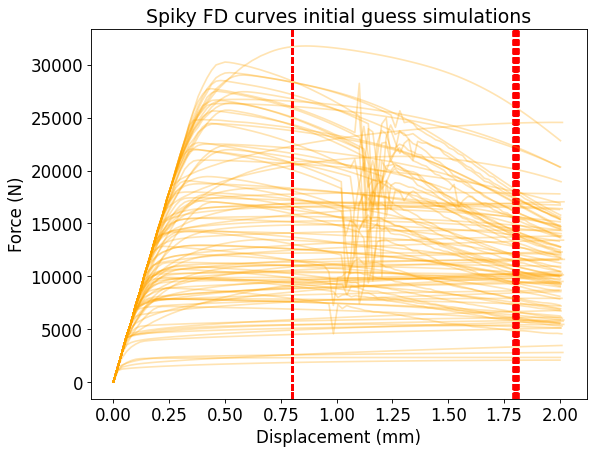

In [16]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# plot initial sims
FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves_unsmooth.npy", allow_pickle=True).tolist()

fontsize = 15

figure(figsize=(8, 6), dpi=80)
plt.xlabel('Displacement (mm)', fontsize=fontsize)
plt.ylabel('Force (N)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Spiky FD curves initial guess simulations', fontsize=fontsize+2)
# Plot target curve from csv file
targetCurve = pd.read_csv(f"{targetPath}/FD_curve.csv")
#plt.plot(targetCurve['displacement/mm'], targetCurve['force/N'], label='Target curve', color="black", alpha=0.5)

total_loss_by_smoothing = 0
for i in range(0, len(FD_Curves)):
#for i in range(0, 10):
    force = np.array(list(FD_Curves.values())[i]['force'])
    # smooth_force = smoothing_force(force, 20, 70)
    # rmse = np.sqrt(np.mean((smooth_force - force)**2))
    # total_loss_by_smoothing += rmse
    # force = smooth_force
    displacement = np.array(list(FD_Curves.values())[i]['displacement'])
    # Draw vertical red line at index 20 of displacement point
    plt.axvline(x=displacement[40], color='r', linestyle='--')
    plt.axvline(x=displacement[90], color='r', linestyle='--')
    #print(find_abrupt_changes_index(force, displacement))
    plt.plot(displacement, force, label='FD curve', color="orange", alpha=0.3)

print(f"Average loss by smoothing: {total_loss_by_smoothing/100}")

In [17]:
# Saving smoothed FD_curves
FD_Curves_smooth = {}
i = 1
for param in FD_Curves:
    force = FD_Curves[param]['force']
    smooth_force = smoothing_force(force, 40, 90, 20000)
    displacement = FD_Curves[param]['displacement']
    FD_Curves_smooth[param] = {}
    FD_Curves_smooth[param]['force'] = smooth_force
    FD_Curves_smooth[param]['displacement'] = displacement
    print(f"Finished curve {i}")
    i += 1

np.save(f"{resultPath}/initial/common/FD_Curves_smooth.npy", FD_Curves_smooth)

Finished curve 1
Finished curve 2
Finished curve 3
Finished curve 4
Finished curve 5
Finished curve 6
Finished curve 7
Finished curve 8
Finished curve 9
Finished curve 10
Finished curve 11
Finished curve 12
Finished curve 13
Finished curve 14
Finished curve 15
Finished curve 16
Finished curve 17
Finished curve 18
Finished curve 19
Finished curve 20
Finished curve 21
Finished curve 22
Finished curve 23
Finished curve 24
Finished curve 25
Finished curve 26
Finished curve 27
Finished curve 28
Finished curve 29
Finished curve 30
Finished curve 31
Finished curve 32
Finished curve 33
Finished curve 34
Finished curve 35
Finished curve 36
Finished curve 37
Finished curve 38
Finished curve 39
Finished curve 40
Finished curve 41
Finished curve 42
Finished curve 43
Finished curve 44
Finished curve 45
Finished curve 46
Finished curve 47
Finished curve 48
Finished curve 49
Finished curve 50
Finished curve 51
Finished curve 52
Finished curve 53
Finished curve 54
Finished curve 55
Finished curve 56
F

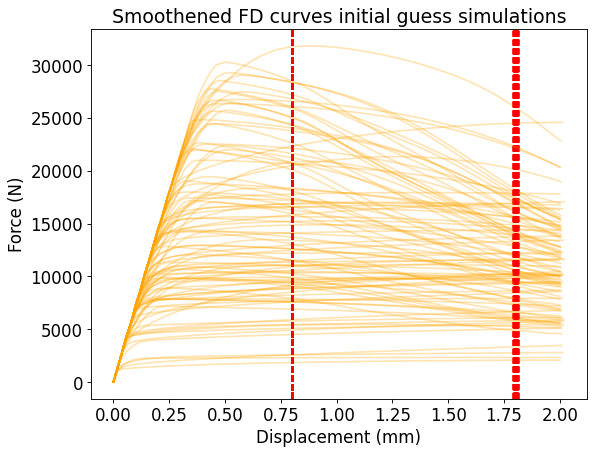

In [18]:
FD_Curves_smooth = np.load(f"{resultPath}/initial/common/FD_Curves_smooth.npy", allow_pickle=True).tolist()

fontsize= 15

figure(figsize=(8, 6), dpi=80)
plt.xlabel('Displacement (mm)', fontsize=fontsize)
plt.ylabel('Force (N)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Smoothened FD curves initial guess simulations', fontsize=fontsize+2)

for i in range(0, len(FD_Curves_smooth)):
#for i in range(0, 10):
    force = np.array(list(FD_Curves_smooth.values())[i]['force'])
    displacement = np.array(list(FD_Curves_smooth.values())[i]['displacement'])
    # Draw vertical red line at index 20 of displacement point
    plt.axvline(x=displacement[40], color='r', linestyle='--')
    plt.axvline(x=displacement[90], color='r', linestyle='--')
    #print(find_abrupt_changes_index(force, displacement))
    plt.plot(displacement, force, label='FD curve', color="orange", alpha=0.3)